In [1]:
# Hyo Sung Kim - Assignment 2

In [2]:
#In terminal:

#create the environment
#conda env create -f conda-environment.yml

# make the environment active
#source activate musa

In [3]:
#Import libraries/packages

import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import IFrame
import seaborn as sns
import json
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data

In [4]:
#Load Data: Shooting Victims Dataset from Open Data Philly

shootings = pd.read_csv('./shootings.csv')
shootings.head() #check correct file upload

,the_geom,lng,objectid,year,dc_key,code,date_,race,sex,age,...,latino,point_x,point_y,dist,time,inside,outside,fatal,lat,offender_injured
0,0101000020E6100000A387CA54FBCB52C0BB2730191EF6...,-75.187215,29,2016.0,201601032572,0111,2016-07-30 00:00:00,B,M,23,...,0.0,-75.187215,39.922794,1.0,02:43:00,0.0,1.0,1.0,39.922794,N
1,0101000020E610000001AB3CE49AC952C0134AFCDDFD04...,-75.150079,30,2015.0,201535022853,0411,2015-03-23 00:00:00,B,M,32,...,0.0,-75.150079,40.038997,35.0,21:36:00,1.0,0.0,0.0,40.038997,N
2,0101000020E61000008AA93630A0CF52C046EF33B254FA...,-75.244152,31,2016.0,201618016129,0411,2016-03-12 00:00:00,B,M,44,...,0.0,-75.244152,39.955710,18.0,20:37:00,0.0,1.0,0.0,39.955710,N
3,NaN,NaN,32,2016.0,201625005325,0411,2016-01-22 00:00:00,B,M,48,...,0.0,NaN,NaN,25.0,16:51:00,0.0,1.0,0.0,NaN,N
4,0101000020E6100000DD7E541EB8CE52C01654F1D28FFB...,-75.229988,33,2016.0,201619084818,0411,2016-09-15 00:00:00,B,M,23,...,0.0,-75.229988,39.965327,19.0,15:35:00,0.0,1.0,0.0,39.965327,N


In [5]:
#Check size

shootings.shape #(5278,25)

(5278, 25)

In [6]:
##### MATPLOTLIB VISUALIZATION #####

#Create plots about the characteristics of shooting victims based on Race, Sex and Age

In [7]:
#Map1: Race

#Check current classification of race
print(shootings['race'].value_counts()) #"The race of the individual shot (Asian, Black, White, American Indian, Other)"

B    4312
W     849
A      33
b       8
        7
M       1
w       1
Name: race, dtype: int64


In [8]:
#Reclassify Race into Asian, Black, White, Other

shootings.loc[shootings.race == 'A','race'] = 'Asian'
shootings.loc[shootings.race == 'B','race'] = 'Black'
shootings.loc[shootings.race == 'b','race'] = 'Black'
shootings.loc[shootings.race == 'W','race'] = 'White'
shootings.loc[shootings.race == 'w','race'] = 'White'
shootings.loc[shootings.race == 'M','race'] = 'Other'
shootings.loc[shootings.race == '','race'] = 'Other'
shootings.loc[shootings.race == ' ','race'] = 'Other'

In [9]:
#Check correct reclassification groups
print(shootings['race'].value_counts())

Black    4320
White     850
Asian      33
Other       8
Name: race, dtype: int64


In [10]:
#To make plot outputs bigger
plt.rcParams["figure.figsize"]=10,10

Text(0.5, 1.0, "Shooting Victims' Race")

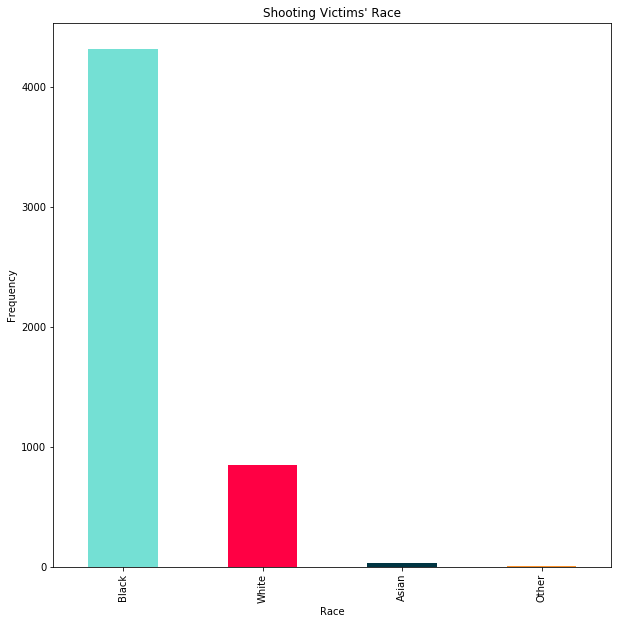

In [11]:
#Barplot Race

my_colors = ['#74E0D4','#FF0044','#003542','#FA9028']
raceBarplot = shootings['race'].value_counts().plot(kind='bar', color=my_colors)
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.title("Shooting Victims' Race")

In [12]:
#Map2: Sex

#Check current classification of sex
print(shootings['sex'].value_counts())
shootings.loc[shootings.sex == 'm','sex'] = 'M'
shootings.loc[shootings.sex == 'B','sex'] = 'M'

shootings.loc[shootings.sex == 'M','sex'] = 'Male'
shootings.loc[shootings.sex == 'F','sex'] = 'Female'

#Check correct reclassification of group
print(shootings['sex'].value_counts())

M    4853
F     417
m       3
B       1
Name: sex, dtype: int64
Male      4857
Female     417
Name: sex, dtype: int64


Text(0.5, 1.0, "Shooting Victims' Sex")

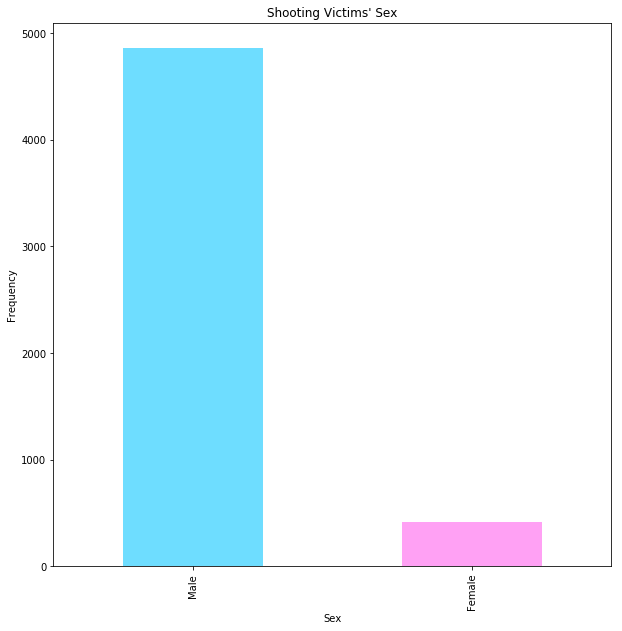

In [13]:
#Barplot Sex

my_colors2=['#6EDDFF','#FFA1F4']

sexBarplot = shootings['sex'].value_counts().plot(kind='bar',color=my_colors2)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Shooting Victims' Sex")

In [19]:
#Map3: Age

#Check age distribution
#print(shootings['age'].value_counts())

for index, row in shootings.iterrows():
    if (row['age'] == " "):
        shootings.at[index,'age'] = -1 #for null values
    else:
        shootings.at[index,'age'] = pd.to_numeric(row['age'])

#Check correct reclassification
print(shootings['age'].value_counts())

 22    326
 23    285
 21    284
 24    278
 19    263
 20    263
 25    254
 26    231
 28    208
 27    207
 18    196
 30    187
 29    180
 17    155
 31    149
 32    118
 33    103
 16    101
 35     95
 34     89
 38     87
 36     79
 40     77
 37     75
 39     59
 41     57
 15     53
 44     51
 43     49
 47     48
      ... 
-1       7
 62      7
 12      6
 63      6
 11      6
 66      5
 68      5
 6       4
 69      3
 70      3
 7       3
 10      3
 2       2
 3       2
 4       2
 5       2
 8       2
 1       2
 75      2
 72      2
 71      2
 67      2
 95      1
 81      1
 76      1
 9       1
 74      1
 73      1
 65      1
 79      1
Name: age, Length: 81, dtype: int64


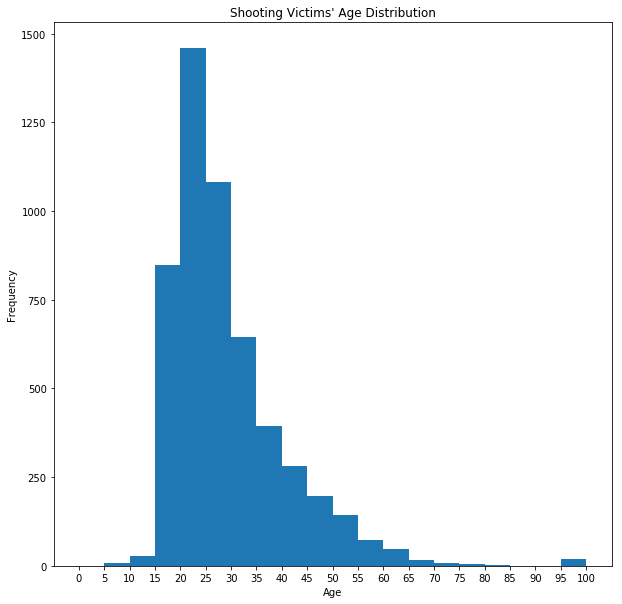

In [20]:
#Age Histogram

shootings_no_age_NA = shootings['age']
shootings_age = shootings_no_age_NA
plt.hist([shootings_age], bins=range(0,105,5))
plt.xlabel("Age")
plt.ylabel("Frequency")
x_start, x_end = plt.xlim()
y_start, y_end = plt.ylim()
plt.xticks(np.arange(0, x_end, 5))
plt.yticks(np.arange(0, y_end,250))
plt.title("Shooting Victims' Age Distribution")
plt.show()

Discussion:
    According to the plots shooting victims' characteristics, it can be seen that the race of shooting victims are mostly young black males. There were almost four times as many black shooting victims as white, followed by a small minority of asians and other races. The sex of shooting victims is strikingly disproportional, where the male victims are more than ten times as that of female victims. Finally, the age distribution barplot shows that most of the victims were recorded to age in their late teens and early thirties.

C:\Users\angel\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


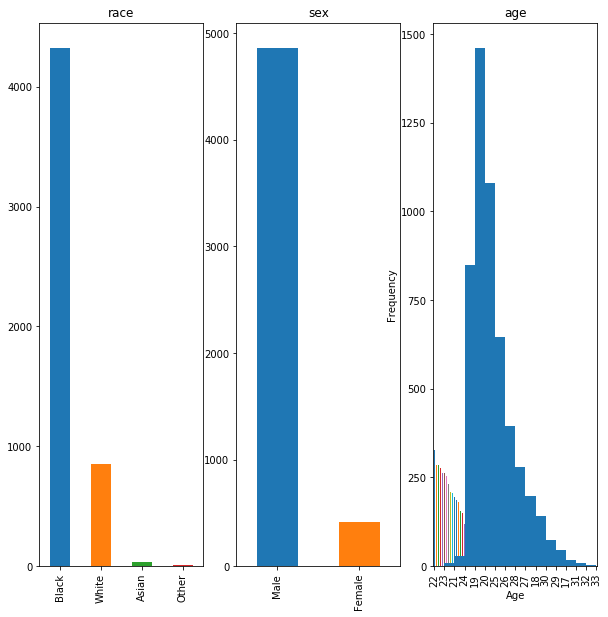

In [21]:
#(Tried, but did not work)
#Combine Race, Sex and Age

categorical_features = ["race", "sex", "age"]
fig, ax = plt.subplots(1, len(categorical_features))

for i, categorical_feature in enumerate(shootings[categorical_features]):
    shootings[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

shootings_age = shootings_no_age_NA
plt.hist([shootings_age], bins=range(0,100,5))
plt.xlabel("Age")
plt.ylabel("Frequency")
x_start, x_end = plt.xlim()
y_start, y_end = plt.ylim()
plt.xticks(np.arange(0, x_end, 5))
plt.yticks(np.arange(0, y_end,250))
plt.title("age")
plt.show()

In [22]:
##### SEABORN VISUALIZATION #####

#Plotting the counts of different types of shootings

In [23]:
#Check for value counts of years
print(shootings['year'].value_counts())

2018.0    1403
2016.0    1301
2015.0    1254
2017.0    1218
2019.0     101
Name: year, dtype: int64


In [24]:
#Check for value counts of codes
print(shootings['code'].value_counts())

0411    3710
0111     947
0300     289
3006     128
0000      28
0350      18
0412      15
3010      14
0407      11
           7
0421       6
0112       5
0401       4
0413       4
0388       4
0340       3
0390       3
0302       2
3016       2
17         2
0301       1
0471       1
0352       1
0370       1
0414       1
0310       1
122        1
0376       1
0380       1
12         1
24         1
0305       1
Name: code, dtype: int64


In [25]:
#Aggregate codes into bigger classifications according to metadata

#0000: Additional Victim
#0100 – 0119: Homicide
#0200 – 0299: Rape
#0300 – 0399: Robbery
#0400 – 0499: Aggravated Assault
#3000 – 3900: Hospital Cases

for index, row in shootings.iterrows():
    if (row['code'] != " " and pd.to_numeric(row['code']) == 0):
        shootings.at[index,'code']="Additional Victim"
    elif (row['code'] != " " and pd.to_numeric(row['code']) >= 100 and pd.to_numeric(row['code'])<=119):
        shootings.at[index,'code']="Homicide"
    elif (row['code'] != " " and pd.to_numeric(row['code']) >= 200 and pd.to_numeric(row['code'])<=299):
        shootings.at[index,'code']="Rape"
    elif (row['code'] != " " and pd.to_numeric(row['code']) >= 300 and pd.to_numeric(row['code'])<=399):
        shootings.at[index,'code']="Robbery"
    elif (row['code'] != " " and pd.to_numeric(row['code']) >= 400 and pd.to_numeric(row['code'])<=499):
        shootings.at[index,'code']="Aggravated Assault"
    elif (row['code'] != " " and pd.to_numeric(row['code']) >= 3000 and pd.to_numeric(row['code'])<=3900):
        shootings.at[index,'code']="Hospital Cases"
    elif (row['code'] != " " and pd.to_numeric(row['code']) >= 120 and pd.to_numeric(row['code'])<=199):
        shootings.at[index,'code']="Other"
    elif (row['code'] != " " and pd.to_numeric(row['code']) < 100):
        shootings.at[index,'code']="Other"
    else: 
        shootings.at[index,'code']="Other"

In [26]:
#Check for correct reclassification
print(shootings['code'].value_counts())

Aggravated Assault    3752
Homicide               952
Robbery                326
Hospital Cases         144
Other                   76
Additional Victim       28
Name: code, dtype: int64


In [27]:
#Group by year
shootings_byYear = shootings.groupby(['year','code']).size().reset_index(name='counts')

In [28]:
#From long to wide format
shootings_toWide = shootings_byYear
shootings_toWide = shootings_toWide.pivot_table(index='code', columns='year', values='counts').reset_index()
shootings_toWide

year,code,2015.0,2016.0,2017.0,2018.0,2019.0
0,Additional Victim,28.0,NaN,NaN,NaN,NaN
1,Aggravated Assault,883.0,912.0,898.0,986.0,72.0
2,Homicide,227.0,228.0,223.0,252.0,22.0
3,Hospital Cases,14.0,45.0,20.0,63.0,2.0
4,Other,23.0,23.0,13.0,17.0,NaN
5,Robbery,79.0,93.0,64.0,85.0,5.0


In [29]:
shootings_toWide.columns

Index(['code', 2015.0, 2016.0, 2017.0, 2018.0, 2019.0], dtype='object', name='year')

In [30]:
#Create Added Columns

shootings_adds = shootings_toWide
shootings_adds.rename(columns={'code': 'Type', 2015.0: "Yr2015", 2016.0: "Yr2016", 2017.0: "Yr2017", 2018.0: "Yr2018", 2019.0: "Yr2019"}, inplace=True)
shootings_toWide.columns

Index(['Type', 'Yr2015', 'Yr2016', 'Yr2017', 'Yr2018', 'Yr2019'], dtype='object', name='year')

In [31]:
#Replace NA values to 0 so that addition returns a value
shootings_adds.fillna(0, inplace = True)
shootings_adds

year,Type,Yr2015,Yr2016,Yr2017,Yr2018,Yr2019
0,Additional Victim,28.0,0.0,0.0,0.0,0.0
1,Aggravated Assault,883.0,912.0,898.0,986.0,72.0
2,Homicide,227.0,228.0,223.0,252.0,22.0
3,Hospital Cases,14.0,45.0,20.0,63.0,2.0
4,Other,23.0,23.0,13.0,17.0,0.0
5,Robbery,79.0,93.0,64.0,85.0,5.0


In [32]:
#Create added columns for stacking plots

#2016 (15+16)
shootings_adds['2016_add'] = shootings_adds['Yr2015'] + shootings_adds['Yr2016']
#2017
shootings_adds['2017_add'] = shootings_adds['2016_add'] + shootings_adds['Yr2017']
#2018
shootings_adds['2018_add'] = shootings_adds['2017_add'] + shootings_adds['Yr2018']
#2019
shootings_adds['2019_add'] = shootings_adds['2018_add'] + shootings_adds['Yr2019']

shootings_adds
#Use columns Yr2015, 2016_add, 2017_add, 2018_add, 2019_add

year,Type,Yr2015,Yr2016,Yr2017,Yr2018,Yr2019,2016_add,2017_add,2018_add,2019_add
0,Additional Victim,28.0,0.0,0.0,0.0,0.0,28.0,28.0,28.0,28.0
1,Aggravated Assault,883.0,912.0,898.0,986.0,72.0,1795.0,2693.0,3679.0,3751.0
2,Homicide,227.0,228.0,223.0,252.0,22.0,455.0,678.0,930.0,952.0
3,Hospital Cases,14.0,45.0,20.0,63.0,2.0,59.0,79.0,142.0,144.0
4,Other,23.0,23.0,13.0,17.0,0.0,46.0,59.0,76.0,76.0
5,Robbery,79.0,93.0,64.0,85.0,5.0,172.0,236.0,321.0,326.0


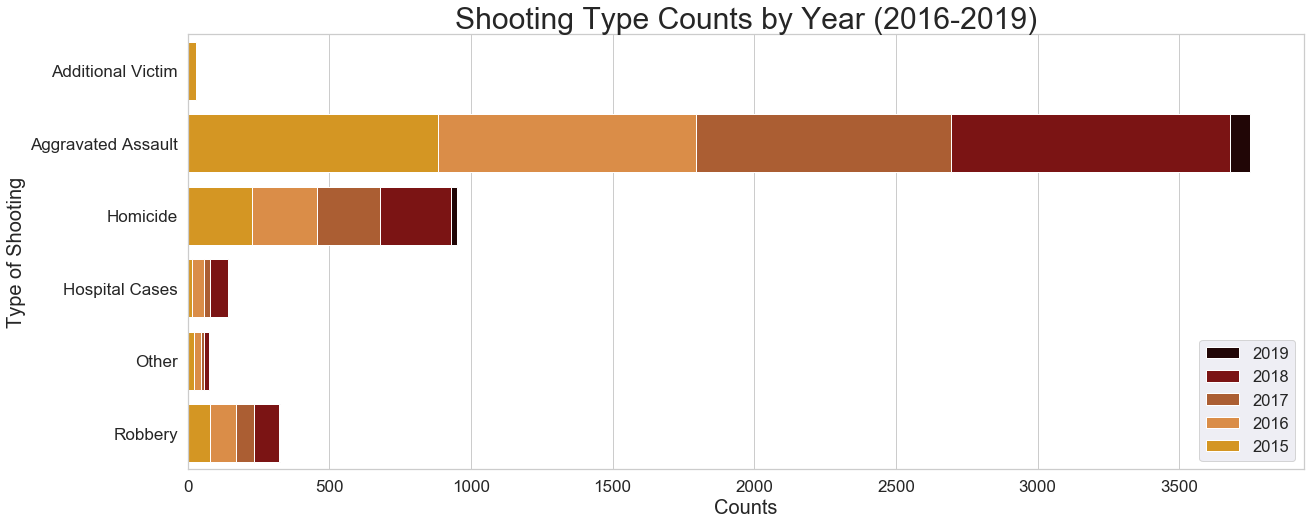

In [33]:
#Horizontal bar plot - assault code by year
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))
ax.tick_params(labelsize=17)

# Data
shootings_adds

# Plot 2019 Shootings
sns.set_color_codes("muted")
sns.barplot(x=shootings_adds['2019_add'], y=shootings_adds["Type"],
           label="2019", color="#260101",ci=None)

# Plot 2018 Shootings
sns.set_color_codes("muted")
sns.barplot(x=shootings_adds['2018_add'], y=shootings_adds["Type"],
           label="2018", color="#8C0303",ci=None)

# Plot 2017 Shootings
sns.set_color_codes("muted")
sns.barplot(x=shootings_adds['2017_add'], y=shootings_adds["Type"],
           label="2017", color="#BF591F",ci=None)

# Plot 2016 Shootings
sns.barplot(x=shootings_adds['2016_add'], y=shootings_adds["Type"],
           label="2016", color="#F28B30",ci=None)

# Plot 2015 Shootings
sns.barplot(x=shootings_adds['Yr2015'], y=shootings_adds["Type"],
           label="2015", color="#F29F05",ci=None)

sns.set(font_scale=2)
ax.set_title('Shooting Type Counts by Year (2016-2019)', fontsize = 30)
sns.set(font_scale=1.5)
ax.set_xlabel('Counts', fontsize=20)
ax.set_ylabel('Type of Shooting',fontsize=20)

ax.legend(loc='lower right')

#Color Choice: The Story Behind How One Color Became the Symbol of Gun Control, https://qz.com/697954/the-story-behind-how-one-color-became-the-symbol-of-gun-control/
#Color Palette: Adobe Color CC, https://color.adobe.com/Palette-de-couleurs-2-color-theme-11910469/

Motivation behind choice for type of seaborn plot:
    The motivation behind this plot was to explore the distribution of different types of shootings according to the FBI's Crime Reporting System's crime classification codes. Knowing the type of shooting may possibly suggest ways in which policy makers could plan for safety measures and better address the issue of violence. 
    The reason for a stacked barplot was to be able to compare the increases/decreases of types of shootings by year. The information was chosen to be shown in horizontal bars as it is easier to estimate and compare the victim counts with a small categorical range of shooting types. Finally, the orange color palette was chosen to display the data, as it is considered the color to represent gun violence awareness. The tone gets darker from year to year, in order to represent that gun violence is a prevalent issue. A "lower" statistic of shooting victims from the previous year does not necessarily mean that things are better, rather people, innocent or not, are still losing their lives while many others continue to be at risk.
    
Discussion:
    It is evident that the most common type of shooting is aggravated assault, followed by homocide and robbery. The rates of aggravated assaults and homicide seem to be relatively consistent since 2016, and the rates of shootings related to robbery and hospital looks to have slightly increased from 2017 to 2018. 2019 has the lowest records since it is still in the beginning of the year. The stagnant and increasing rates of shootings is suggestive of the severity of this issue across Philadelphia County and urgently calls for stronger gun control policies.

In [34]:
##### ALTAIR VISUALIZATION #####

#Summary:
# 1- Year Distribution of Shootings Heatmap
# 2- Average Age of Shooting Victims by Zillow Neighborhoods
# 3- Aggravated Assaults: Relating Age, Race and Time of Shooting

In [35]:
#Check the columns
shootings.columns

Index(['the_geom', 'lng', 'objectid', 'year', 'dc_key', 'code', 'date_',
       'race', 'sex', 'age', 'wound', 'officer_involved',
       'the_geom_webmercator', 'offender_deceased', 'location', 'latino',
       'point_x', 'point_y', 'dist', 'time', 'inside', 'outside', 'fatal',
       'lat', 'offender_injured'],
      dtype='object')

In [36]:
#Altair Visualization 1 - Frequency of Shootings by Month and Hour

In [37]:
#Make months column

shootings_months = shootings
shootings_months['Month'] = shootings_months['date_']
for index, date in shootings_months.iterrows():
    shootings_months.at[index,'Month']=pd.to_numeric(date['Month'][5:7])

#Check that combining is 12 months    
print(shootings_months['Month'].value_counts())

8     556
7     543
9     486
5     469
6     450
10    449
1     441
12    429
11    429
4     384
3     334
2     308
Name: Month, dtype: int64


In [38]:
#Make time column

shootings_time = shootings_months
shootings_time['Hour'] = shootings_time['time']

for index, time in shootings_time.iterrows():
    if (pd.isna(time['Hour'])==False):
        shootings_time.at[index,'Hour']=pd.to_numeric(time['Hour'].split(':')[0])

In [39]:
#Check for correct 24 hours
shootings['Hour'].value_counts()

23    491
21    472
22    456
20    403
0     380
1     335
19    301
18    296
2     260
17    226
15    202
16    196
3     186
14    169
13    160
12    129
11    118
4     110
5      76
10     71
9      55
6      45
7      43
8      35
Name: Hour, dtype: int64

In [40]:
#Make incidence count column

shootings['Incidence']=1
#check that correct column has been made
shootings.head()

,the_geom,lng,objectid,year,dc_key,code,date_,race,sex,age,...,dist,time,inside,outside,fatal,lat,offender_injured,Month,Hour,Incidence
0,0101000020E6100000A387CA54FBCB52C0BB2730191EF6...,-75.187215,29,2016.0,201601032572,Homicide,2016-07-30 00:00:00,Black,Male,23,...,1.0,02:43:00,0.0,1.0,1.0,39.922794,N,7,2,1
1,0101000020E610000001AB3CE49AC952C0134AFCDDFD04...,-75.150079,30,2015.0,201535022853,Aggravated Assault,2015-03-23 00:00:00,Black,Male,32,...,35.0,21:36:00,1.0,0.0,0.0,40.038997,N,3,21,1
2,0101000020E61000008AA93630A0CF52C046EF33B254FA...,-75.244152,31,2016.0,201618016129,Aggravated Assault,2016-03-12 00:00:00,Black,Male,44,...,18.0,20:37:00,0.0,1.0,0.0,39.955710,N,3,20,1
3,NaN,NaN,32,2016.0,201625005325,Aggravated Assault,2016-01-22 00:00:00,Black,Male,48,...,25.0,16:51:00,0.0,1.0,0.0,NaN,N,1,16,1
4,0101000020E6100000DD7E541EB8CE52C01654F1D28FFB...,-75.229988,33,2016.0,201619084818,Aggravated Assault,2016-09-15 00:00:00,Black,Male,23,...,19.0,15:35:00,0.0,1.0,0.0,39.965327,N,9,15,1


In [41]:
#Groupby months and hours

annualshootings = shootings
annualshootings = annualshootings.groupby(['Month','Hour']).sum().reset_index()
annualshootings = annualshootings[["Month","Hour","Incidence"]]
annualshootings.head()

,Month,Hour,Incidence
0,1,0,27
1,1,1,28
2,1,2,21
3,1,3,20
4,1,4,12


In [42]:
#Rename months values to month names

annualshootings2=annualshootings
annualshootings2.loc[annualshootings2.Month == 1,'Month'] = 'January'
annualshootings2.loc[annualshootings2.Month == 2,'Month'] = 'February'
annualshootings2.loc[annualshootings2.Month == 3,'Month'] = 'March'
annualshootings2.loc[annualshootings2.Month == 4,'Month'] = 'April'
annualshootings2.loc[annualshootings2.Month == 5,'Month'] = 'May'
annualshootings2.loc[annualshootings2.Month == 6,'Month'] = 'June'
annualshootings2.loc[annualshootings2.Month == 7,'Month'] = 'July'
annualshootings2.loc[annualshootings2.Month == 8,'Month'] = 'August'
annualshootings2.loc[annualshootings2.Month == 9,'Month'] = 'September'
annualshootings2.loc[annualshootings2.Month == 10,'Month'] = 'October'
annualshootings2.loc[annualshootings2.Month == 11,'Month'] = 'November'
annualshootings2.loc[annualshootings2.Month == 12,'Month'] = 'December'

#check correct renaming of values
#annualshootings2.head()
#annualshootings['Month'] #for whole list

In [43]:
# Define a custom colormap using Hex codes & HTML color names
colormap = alt.Scale(domain=[0,10,20,30,50,70],
                     range=['#F0F8FF', 'cornflowerblue', 'mediumseagreen', '#FFEE00', 'darkorange', 'firebrick'],
                     type='sqrt')

In [44]:
shootingsHeat = alt.Chart(annualshootings2).mark_rect().encode(
    x = alt.X('Hour:O'),
    y = alt.Y('Month:N',sort= {"op": "distinct", "field": "sort_order:O"}),
    color= alt.Color('Incidence:Q',scale=colormap),
    tooltip=[alt.Tooltip('Incidence:Q', aggregate='sum', title='Count')]
)

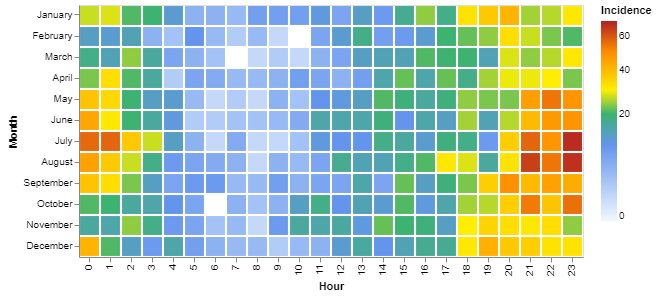

In [45]:
shootingsHeat

Discussion:
    This heatmap combines information on when victims were shot between 2016 and 2019, based on hour of shooting and month. It can be seen that the rate of shootings increase from the afternon to the evening and night hours, and are more frequent during the summer and early fall months (May ~ September). It makes sense that shootings are less likely to occur during broad daylight and during cold winter days. On the other hand, darker environments and times where there are more people out make people more vulnerable.

In [46]:
#Altair Visualization 2 - Average Age of Shooting Victims by (Zillow) Neighborhoods

In [47]:
#Save the heatmap
shootingsHeat.save('shootingsHeat.html')

In [48]:
#Check the shootings dataframe
shootings.head()

,the_geom,lng,objectid,year,dc_key,code,date_,race,sex,age,...,dist,time,inside,outside,fatal,lat,offender_injured,Month,Hour,Incidence
0,0101000020E6100000A387CA54FBCB52C0BB2730191EF6...,-75.187215,29,2016.0,201601032572,Homicide,2016-07-30 00:00:00,Black,Male,23,...,1.0,02:43:00,0.0,1.0,1.0,39.922794,N,7,2,1
1,0101000020E610000001AB3CE49AC952C0134AFCDDFD04...,-75.150079,30,2015.0,201535022853,Aggravated Assault,2015-03-23 00:00:00,Black,Male,32,...,35.0,21:36:00,1.0,0.0,0.0,40.038997,N,3,21,1
2,0101000020E61000008AA93630A0CF52C046EF33B254FA...,-75.244152,31,2016.0,201618016129,Aggravated Assault,2016-03-12 00:00:00,Black,Male,44,...,18.0,20:37:00,0.0,1.0,0.0,39.955710,N,3,20,1
3,NaN,NaN,32,2016.0,201625005325,Aggravated Assault,2016-01-22 00:00:00,Black,Male,48,...,25.0,16:51:00,0.0,1.0,0.0,NaN,N,1,16,1
4,0101000020E6100000DD7E541EB8CE52C01654F1D28FFB...,-75.229988,33,2016.0,201619084818,Aggravated Assault,2016-09-15 00:00:00,Black,Male,23,...,19.0,15:35:00,0.0,1.0,0.0,39.965327,N,9,15,1


In [49]:
#upload Zillow Neighborhoods
zillow = gpd.read_file('./zillow_neighborhoods.geojson')
zillow = zillow.to_crs(epsg=3857)

,ZillowName,geometry
0,Academy Gardens,POLYGON ((-8348795.676844054 4875297.327437355...
1,Airport,POLYGON ((-8370923.380392455 4850336.405079939...
2,Allegheny West,POLYGON ((-8367432.106275852 4866417.819736993...
3,Andorra,"POLYGON ((-8373967.120433775 4875663.02380158,..."
4,Aston Woodbridge,POLYGON ((-8349918.769724508 4873746.906470324...


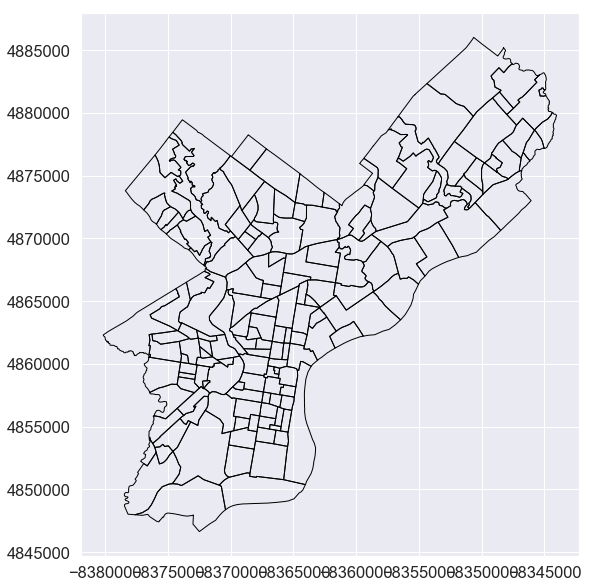

In [50]:
#Test plot
zillow.plot(facecolor='none', edgecolor='black')
zillow.head()

In [51]:
#Check projection
zillow.crs

{'init': 'epsg:3857', 'no_defs': True}

In [52]:
#Check type of data and columns
print(type(shootings))
shootings.columns

<class 'pandas.core.frame.DataFrame'>


Index(['the_geom', 'lng', 'objectid', 'year', 'dc_key', 'code', 'date_',
       'race', 'sex', 'age', 'wound', 'officer_involved',
       'the_geom_webmercator', 'offender_deceased', 'location', 'latino',
       'point_x', 'point_y', 'dist', 'time', 'inside', 'outside', 'fatal',
       'lat', 'offender_injured', 'Month', 'Hour', 'Incidence'],
      dtype='object')

In [53]:
#convert to geodataframe
shootings = shootings.dropna(subset=['lat','lng'])
shootings['Coordinates']=list(zip(shootings['lng'],shootings['lat']))
#shootings.head()

C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
from shapely.geometry import Point
shootings['Coordinates']=shootings['Coordinates'].apply(Point)
shootings.head()

C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,the_geom,lng,objectid,year,dc_key,code,date_,race,sex,age,...,time,inside,outside,fatal,lat,offender_injured,Month,Hour,Incidence,Coordinates
0,0101000020E6100000A387CA54FBCB52C0BB2730191EF6...,-75.187215,29,2016.0,201601032572,Homicide,2016-07-30 00:00:00,Black,Male,23,...,02:43:00,0.0,1.0,1.0,39.922794,N,7,2,1,POINT (-75.18721504 39.92279353)
1,0101000020E610000001AB3CE49AC952C0134AFCDDFD04...,-75.150079,30,2015.0,201535022853,Aggravated Assault,2015-03-23 00:00:00,Black,Male,32,...,21:36:00,1.0,0.0,0.0,40.038997,N,3,21,1,POINT (-75.15007883 40.03899741)
2,0101000020E61000008AA93630A0CF52C046EF33B254FA...,-75.244152,31,2016.0,201618016129,Aggravated Assault,2016-03-12 00:00:00,Black,Male,44,...,20:37:00,0.0,1.0,0.0,39.955710,N,3,20,1,POINT (-75.24415212 39.95570972)
4,0101000020E6100000DD7E541EB8CE52C01654F1D28FFB...,-75.229988,33,2016.0,201619084818,Aggravated Assault,2016-09-15 00:00:00,Black,Male,23,...,15:35:00,0.0,1.0,0.0,39.965327,N,9,15,1,POINT (-75.2299877 39.96532666)
5,0101000020E610000018BD4B90AECD52C0EAE83C53FDF9...,-75.213780,34,2015.0,201518014258,Aggravated Assault,2015-03-08 00:00:00,Black,Female,46,...,10:57:00,1.0,0.0,0.0,39.953043,N,3,10,1,POINT (-75.21377952 39.95304337)


In [55]:
#Turn to geoDataFrame
shootings = gpd.GeoDataFrame(shootings, geometry='Coordinates',
                                  crs={'int':'epsg:4326'})

{'int': 'epsg:4326'}


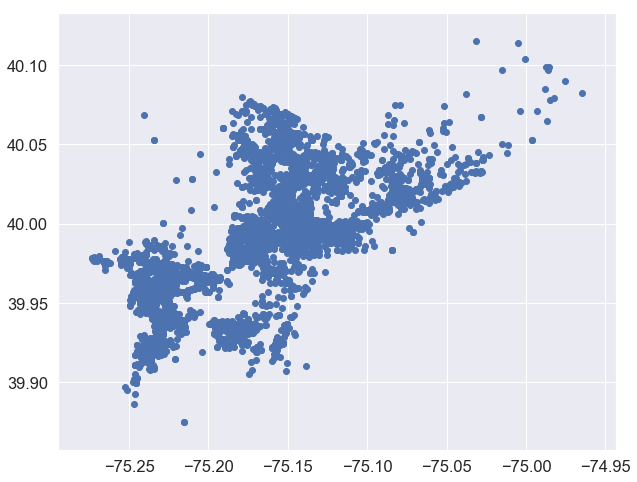

In [56]:
#Check correct settings
print(shootings.crs)
#Test plot
shootings.plot()

In [57]:
#Spatial join

#Shootings- epsg:4326
#Zillow - epsg:3857

zillow = zillow.to_crs(epsg=4326)
shootings.crs = zillow.crs
joined = gpd.sjoin(shootings, zillow, op='within', how='left')
joined

,the_geom,lng,objectid,year,dc_key,code,date_,race,sex,age,...,outside,fatal,lat,offender_injured,Month,Hour,Incidence,Coordinates,index_right,ZillowName
0,0101000020E6100000A387CA54FBCB52C0BB2730191EF6...,-75.187215,29,2016.0,201601032572,Homicide,2016-07-30 00:00:00,Black,Male,23,...,1.0,1.0,39.922794,N,7,2,1,POINT (-75.18721504 39.92279353),58.0,Grays Ferry
1,0101000020E610000001AB3CE49AC952C0134AFCDDFD04...,-75.150079,30,2015.0,201535022853,Aggravated Assault,2015-03-23 00:00:00,Black,Male,32,...,0.0,0.0,40.038997,N,3,21,1,POINT (-75.15007883 40.03899741),72.0,Logan
2,0101000020E61000008AA93630A0CF52C046EF33B254FA...,-75.244152,31,2016.0,201618016129,Aggravated Assault,2016-03-12 00:00:00,Black,Male,44,...,1.0,0.0,39.955710,N,3,20,1,POINT (-75.24415212 39.95570972),21.0,Cobbs Creek
4,0101000020E6100000DD7E541EB8CE52C01654F1D28FFB...,-75.229988,33,2016.0,201619084818,Aggravated Assault,2016-09-15 00:00:00,Black,Male,23,...,1.0,0.0,39.965327,N,9,15,1,POINT (-75.2299877 39.96532666),60.0,Haddington
5,0101000020E610000018BD4B90AECD52C0EAE83C53FDF9...,-75.213780,34,2015.0,201518014258,Aggravated Assault,2015-03-08 00:00:00,Black,Female,46,...,0.0,0.0,39.953043,N,3,10,1,POINT (-75.21377952 39.95304337),126.0,Spruce Hill
6,0101000020E6100000EAE83C53BDC752C08D518D4DE1FF...,-75.120930,35,2016.0,201625059158,Aggravated Assault,2016-07-14 00:00:00,Black,Male,18,...,1.0,0.0,39.999063,N,7,20,1,POINT (-75.12093049000001 39.9990632),135.0,Upper Kensington
7,0101000020E6100000A946755BDEC952C00AB097BF2508...,-75.154197,36,2016.0,201614062144,Aggravated Assault,2016-08-04 00:00:00,Black,Male,25,...,1.0,0.0,40.063652,N,8,21,1,POINT (-75.15419661 40.06365199),140.0,West Oak Lane
8,0101000020E61000007AB9780DF4C052C074A9196B620C...,-75.014896,37,2015.0,201507036376,Homicide,2015-12-07 00:00:00,White,Male,69,...,1.0,1.0,40.096753,N,12,15,1,POINT (-75.01489579 40.09675349),123.0,Somerton
9,0101000020E61000004AFA28E1D1CA52C0EDA563AD2509...,-75.169060,38,2015.0,201514031229,Robbery,2015-04-23 00:00:00,Black,Male,21,...,1.0,0.0,40.071462,N,4,22,1,POINT (-75.16906003 40.07146232),16.0,Cedarbrook
10,0101000020E61000006700B90E5FCB52C0F42E83D668F7...,-75.177677,39,2015.0,201517038973,Aggravated Assault,2015-08-12 00:00:00,Black,Male,21,...,1.0,0.0,39.932887,N,8,0,1,POINT (-75.17767685 39.9328869),111.0,Point Breeze


In [58]:
#Make column to numeric to take the mean later
joined['age']=pd.to_numeric(joined['age'])

In [59]:
#grouby neighborhood and find mean age of shooting victims

ageByNeighborhood = joined.groupby(['ZillowName'])['age'].mean()

print(type(ageByNeighborhood))

<class 'pandas.core.series.Series'>


In [60]:
#Make series into dataframe and reset index

ageByNeighborhood = ageByNeighborhood.to_frame('N').reset_index()
ageByNeighborhood.head()

,ZillowName,N
0,Airport,47.000000
1,Allegheny West,28.208791
2,Andorra,47.000000
3,Bartram Village,28.500000
4,Bella Vista,19.000000


In [61]:
#Combine to Zillow Neighborhoods
ageByNeighborhood = pd.merge(zillow, ageByNeighborhood, on='ZillowName')
ageByNeighborhood= ageByNeighborhood.to_crs(epsg=3857)

C:\Users\angel\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8381967.050521846, -8342231.252889296, 4844665.404724945, 4887984.248160507)

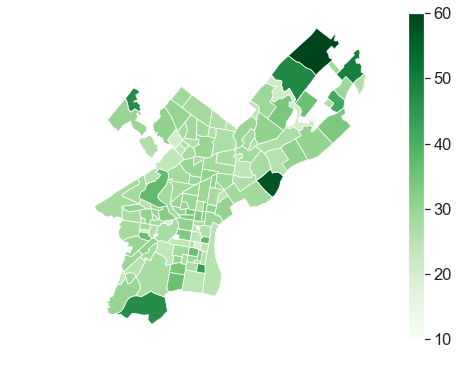

In [62]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# Test map 
ageByNeighborhood.plot(column='N', cmap='Greens', vmin=10, vmax=60, linewidth=0.8, ax=ax, edgecolor='white', legend=True)
ax.axis('off')

In [63]:
# create an altair data source from a GeoJSON representation
ageByNeighborhood_altair  = alt.InlineData(values=ageByNeighborhood.to_crs(epsg=4326).to_json(),
                                           format=alt.DataFormat(property='features',type='json'))
print(type(ageByNeighborhood_altair))

<class 'altair.vegalite.v2.schema.core.InlineData'>


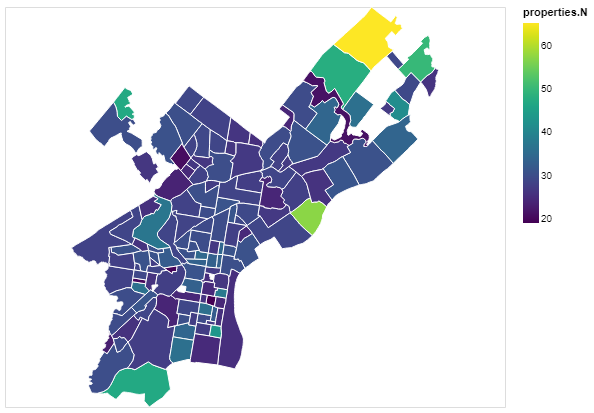

In [64]:
#Average Age of Shooting Victims by Zillow Neighborhoods

# plot map, where variables ares nested within `properties`, 
alt.Chart(ageByNeighborhood_altair).mark_geoshape(
    stroke='white',
).properties(
    width=500,
    height=400,
    projection={"type":'mercator'},
).encode(
    tooltip=['properties.N:Q', 'properties.ZillowName:N'],
    color='properties.N:Q'
)

Discussion:
    This map displays the average age of shooting victims by neighborhoods. Having a sense on the age group of victims could possibly bring up questions about neighborhood conditions and the cause for why a specific age group is targeted. With the exception of a few neighborhoods in the southern and northern parts of Philadelphia, overall, the average age is pretty similar all throughout the county, ranging between the mid twenties and early thirties.

In [65]:
#Altair Visualization 3 - Aggravated Assaults: Relating Age, Race and Time of Shooting

In [66]:
#Is there a relationship/pattern between shooting victims' Age and Time of shooting?
#Scatterplot of time vs age, separated by race for "Aggravated Assault" type of shooting

#Trim aggravated assaults records
assaults = joined.loc[joined['code']=='Aggravated Assault']
print(assaults.crs)
assaults.crs = {'int': 'epsg:3857'}
print(assaults.crs)
print('Number of Aggravated Assaults: ',len(assaults))

{'init': 'epsg:4326', 'no_defs': True}
{'int': 'epsg:3857'}
Number of Aggravated Assaults:  3693


In [67]:
print(type(assaults))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [68]:
#Check for correct changes
assaults.head()

,the_geom,lng,objectid,year,dc_key,code,date_,race,sex,age,...,outside,fatal,lat,offender_injured,Month,Hour,Incidence,Coordinates,index_right,ZillowName
1,0101000020E610000001AB3CE49AC952C0134AFCDDFD04...,-75.150079,30,2015.0,201535022853,Aggravated Assault,2015-03-23 00:00:00,Black,Male,32.0,...,0.0,0.0,40.038997,N,3,21,1,POINT (-75.15007883 40.03899741),72.0,Logan
2,0101000020E61000008AA93630A0CF52C046EF33B254FA...,-75.244152,31,2016.0,201618016129,Aggravated Assault,2016-03-12 00:00:00,Black,Male,44.0,...,1.0,0.0,39.955710,N,3,20,1,POINT (-75.24415212 39.95570972),21.0,Cobbs Creek
4,0101000020E6100000DD7E541EB8CE52C01654F1D28FFB...,-75.229988,33,2016.0,201619084818,Aggravated Assault,2016-09-15 00:00:00,Black,Male,23.0,...,1.0,0.0,39.965327,N,9,15,1,POINT (-75.2299877 39.96532666),60.0,Haddington
5,0101000020E610000018BD4B90AECD52C0EAE83C53FDF9...,-75.213780,34,2015.0,201518014258,Aggravated Assault,2015-03-08 00:00:00,Black,Female,46.0,...,0.0,0.0,39.953043,N,3,10,1,POINT (-75.21377952 39.95304337),126.0,Spruce Hill
6,0101000020E6100000EAE83C53BDC752C08D518D4DE1FF...,-75.120930,35,2016.0,201625059158,Aggravated Assault,2016-07-14 00:00:00,Black,Male,18.0,...,1.0,0.0,39.999063,N,7,20,1,POINT (-75.12093049000001 39.9990632),135.0,Upper Kensington


In [69]:
#Save data frame to .csv
source = pd.DataFrame(assaults[['race','age','Hour']])
source
source.to_csv("assaults")

In [70]:
#Read assaults file
assaults_df = pd.read_csv("./assaults")
assaults_df.head()

,Unnamed: 0,race,age,Hour
0,1,Black,32.0,21
1,2,Black,44.0,20
2,4,Black,23.0,15
3,5,Black,46.0,10
4,6,Black,18.0,20


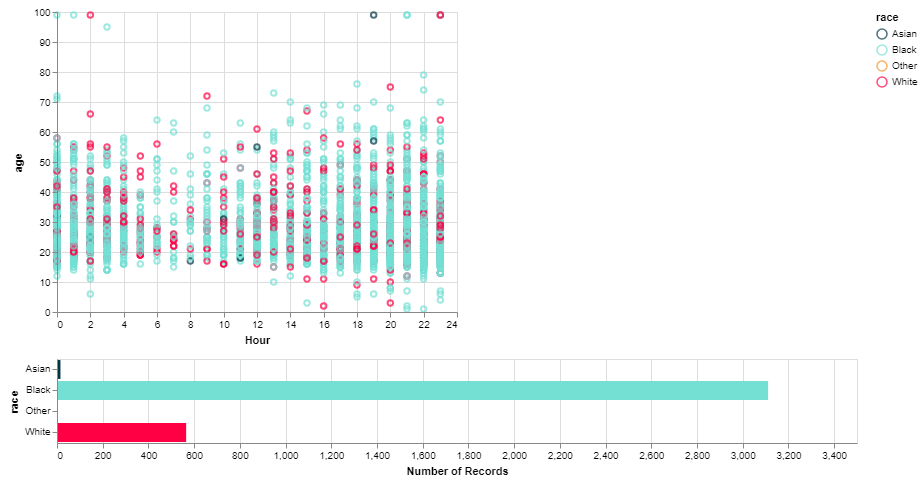

In [71]:
#Create scatterplot with brush functionality

source = assaults_df
source = source.dropna(subset=['race'])

domain=['Asian','Black','Other','White']
my_colors3=['#003542','#74E0D4','#FA9028','#FF0044']

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Hour:Q',
    y='age:Q',
    #color=alt.condition(brush, 'race:N', alt.value('grey'))
    color=alt.Color('race:N', scale=alt.Scale(domain=domain, range=my_colors3))
).add_selection(brush)


##### EXTRA CREDIT PART #####

#bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='race:N',
    color='race:N',
    x='count(race):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart = alt.vconcat(points, bars, data=source) # vertical stacking
chart

Discussion:
    Although there did not seem to be any meaningful pattern on the average age of shooting victims in the previous map, another question of interest was to explore whether or not there was a relationship between the age, race and time of shooting of victims for the most common type of shooting, aggravated assaults. Disregarding outlier ages (close to the 100s), most shooting victims are black and age between the teens and sixties, as observed by the previous graphs. The most interesting observation is that, it seems that younger victims of less than ten years are shot in the evening hours. 

In [72]:
#Resources
#Shootings Dataset: Open Data Philly, https://www.opendataphilly.org/dataset/shooting-victims/resource/a6240077-cbc7-46fb-b554-39417be606ee
#Shootings Metadata: Open Data Philly, http://metadata.phila.gov/#home/datasetdetails/5719551277d6389f3005a610/representationdetails/5719551277d6389f3005a614/?view_287_page=2&view_287_sort=field_17|asc
#Lecture 2 Notes
#Lecture 3 Notes